## Artificial Intelligence (AI) Assisted Skin Wound Classification and Screening System (Binary Classification) - Final File

In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
print(tf.__version__)

2.19.0


### Data Pre-Processing

In [5]:
training_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_2/training_set'
validation_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_2/validation_set'
test_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_2/test_set' 


### Pre-Processing Training and Validation Set

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,       # Normalizing pixel values to between 0 and 1
                                   shear_range = 0.2,    # Perform Random shear transformation
                                   zoom_range = 0.2,     # Random zoom transformation
                                   horizontal_flip = True) # Random Horizontal flip

# We set up the ImageDataGenerator for training dataset
training_set = train_datagen.flow_from_directory(training_data,  # Path to training data
                                                 target_size = (64,64), # Resize images to 64x64 pixels
                                                 batch_size = 32,       # Number of samples per batch
                                                 class_mode = 'binary') # Binary classification


# Setting up the ImageDataGenerator for the validation dataset
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(validation_data,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')




Found 900 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


### Pre-Processing Test Set

In [9]:

test_set = validation_datagen.flow_from_directory(test_data,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 240 images belonging to 2 classes.


### CNN Model Configuration 

In [11]:
# Initialize the CNN
model = Sequential()

# Adding the first Convolutional layer with number of filters = 32
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape=[64,64,3])) # Number of filters applied = 32
# Adding the Pooling layer
model.add(MaxPooling2D(pool_size=2, strides = 2))


# Adding a Second Convolutional layer with number of filters = 64 and the Pooling layer
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu')) # Number of filters applied = 64
model.add(MaxPooling2D(pool_size=2, strides = 2))

# Adding a third Convolutional layer with number of filters = 128 and the Pooling layer
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))  # Number of filters applied = 128
model.add(MaxPooling2D(pool_size=2, strides = 2))


# Flattening Layer - Flattening of 2D Pooled features into a 1D Vector
model.add(Flatten())
# Full Connected Layer to avoid Overfitting
model.add(Dense(128, activation = 'relu')) # Hidden layer
model.add(Dropout(0.25))  # Dropout layer to reduce overfitting


# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid')) # output layer with a single neuron and sigmoid activation function (for Binary Classification)



C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### CNN Model Training :-

#### CNN Compilation

In [13]:
# Compile the CNN model
model.compile(optimizer=Adam(learning_rate=0.001), # Adam Optimizer with small learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training CNN Model - Training CNN Model on Training Set and Evaluation of Validation Set

In [15]:
# Train the model
history = model.fit(x=training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size, # Total number of batches of data to process per epoch
                    validation_data = validation_set, # The validation data for evaluating model performance after each epoch
                    validation_steps = validation_set.samples // validation_set.batch_size,
                    epochs = 100
                    )


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5327 - loss: 0.7045 - val_accuracy: 0.6875 - val_loss: 0.6518
Epoch 2/100
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.5625 - loss: 0.6740

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.5625 - loss: 0.6740 - val_accuracy: 0.6625 - val_loss: 0.6478
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 872ms/step - accuracy: 0.6005 - loss: 0.6492 - val_accuracy: 0.7250 - val_loss: 0.5798
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.6250 - loss: 0.6008 - val_accuracy: 0.7000 - val_loss: 0.5858
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 838ms/step - accuracy: 0.6439 - loss: 0.6104 - val_accuracy: 0.7094 - val_loss: 0.5726
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.6250 - loss: 0.6895 - val_accuracy: 0.7063 - val_loss: 0.5583
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 859ms/step - accuracy: 0.6861 - loss: 0.6009 - val_accuracy: 0.7094 - val_loss: 0.5649
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.5625 - loss: 0.7264 - val_accuracy: 0.7031 - val_loss: 0.5540
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 859ms/step - accuracy: 0.6681 - loss: 0.5838 - val_accuracy: 0.

### Information Visualization : Training Result

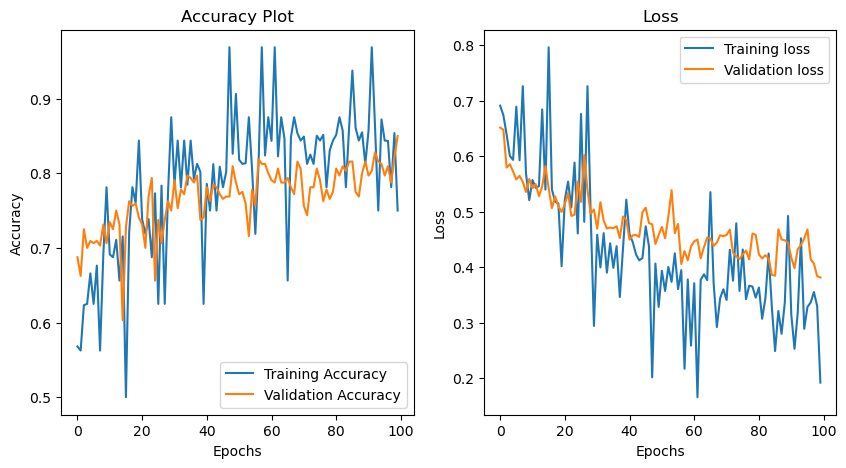

In [17]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(10,5))
# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predictions

In [19]:
print(os.listdir(test_data))

['Actinic keratosis', 'Benign keratosis']


In [21]:
print(training_set.class_indices)

{'Actinic keratosis': 0, 'Benign keratosis': 1}


In [27]:
# Defining the folder paths
Actinickeratosis_folder = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_2/test_set/Actinic keratosis'
Benignkeratosis_folder = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_2/test_set/Benign keratosis'

Image_folder_path = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_2/Prediction_set'

# Here we dynamically retrieve class indices from the available training set 
class_dict = training_set.class_indices
reverse_class_dict = {v: k for k, v in class_dict.items()}

# Initialize labels lists to ground truth levels from the test set
true_labels = []
predicted_labels = []

# Collecting true labels from the test_set folder structure
for img_name in os.listdir(Actinickeratosis_folder):
    if img_name.lower().endswith(('jpg','jpeg')):
        true_labels.append(class_dict['Actinic keratosis'])

for img_name in os.listdir(Benignkeratosis_folder):
    if img_name.lower().endswith(('jpg','jpeg')):
        true_labels.append(class_dict['Benign keratosis'])
        

# Looping through the Prediction_set images and predicting their corresponding labels
for img_name in os.listdir(Image_folder_path):
    if img_name.lower().endswith(('jpg','jpeg')):
        img_path = os.path.join(Image_folder_path,img_name)

        # Perform Image Pre-Processing
        test_image = image.load_img(img_path,target_size=(64,64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0) # Adding batch dimensions
        test_image = test_image/255.0 # Normalizing the fed image


        # Predictions
        result = model.predict(test_image)
        predicted_class = int(result[0][0] >= 0.5) # Sigmoid threshold
        predicted_labels.append(predicted_class)

        # Printing the obtained predictions 
        # print(f"Image : {img_name} --> Predicted Class : {reverse_class_dict[predicted_class]}")

# Converting the lists to numpy arrays for sklearn
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)


        


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [29]:
print(true_labels, end = '')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

In [31]:
print(predicted_labels, end = '')

[1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0]

In [33]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels,predicted_labels)
# Printing the confusion matrix
print('Confusion Matrix :')
print(conf_matrix)

Confusion Matrix :
[[14 76]
 [69 81]]


In [35]:
# Generate Classification report 
Report = classification_report(true_labels,predicted_labels)
# Printing the Classification report
print('Classification Report :')
print(Report)

Classification Report :
              precision    recall  f1-score   support

           0       0.17      0.16      0.16        90
           1       0.52      0.54      0.53       150

    accuracy                           0.40       240
   macro avg       0.34      0.35      0.34       240
weighted avg       0.39      0.40      0.39       240



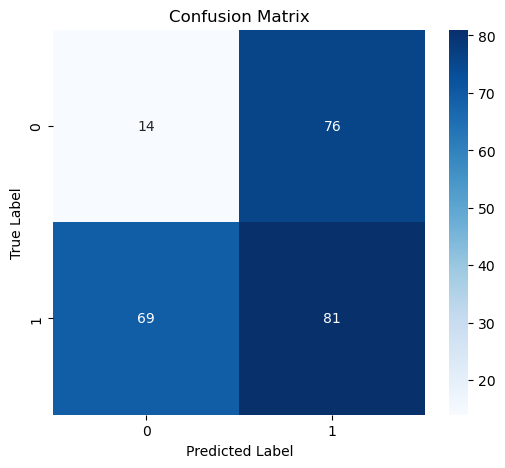

In [37]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()